In [103]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bs4 import BeautifulSoup 
import contractions
import re
import string, unicodedata
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import stopwords                       
from nltk.tokenize import word_tokenize, sent_tokenize 
from nltk.stem.wordnet import WordNetLemmatizer  
nltk.download('vader_lexicon')
import flair

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/giridharana.r/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [143]:
import easygui

In [144]:
path = easygui.fileopenbox()


In [41]:
path = '/Users/giridharana.r/Desktop/kannan bro work/BT-Broadband-reviews Updated.csv'

In [42]:
df = pd.read_csv(path)

In [43]:
df.head()

,Name,Location,Date,Reviews
0,Ludmila,Essex,12/31/21,"BT is a disappointment!\n\n\nI have made a new order with BT on Black Friday.\nThe gentleman who spoke to me was extremely polite and helpful and gave a good deal. Nonetheless, I have waited 30 days to have my money back service up and running, and the day before my service is supposed to go live, I Called BT.\nI called BT and explained that an engineer has been booked (since the end of November) to complete some work and install the required equipment, for my service to go live tomorrow.\nDuring the call, I was presented with new information that the engineers have been trying to contact the building management society, since the 1st of December, and have not obtained a response.\nI explained to the advisor on the phone that I should have been notified of what is going on, so I could have made the required arrangements to sort out this issue.\nI also stated that it has been 30 days and that in the last 2 weeks, BT employees have been conduction research/work in my residential area. I mentioned that I was failing to understand why they did not notice that something was NOT right. My point is, I am not the only BT customer in Essex; if they are sending letters and not receiving a response from the building society, is there no other way to contact them?\nCould they not have sent an email or called them?\nI asked the advisor and he stated that he received a 'note' from the engineer at ""1 minute ago"" stating that "" they tried to contact the building management 3x and if they do not receive a response the order will be cancelled"".\nI now ask if they can write a letter and send it so swiftly, could they have NOT avoided this issue?!\nI am extremely disappointed and shocked that BT has this level of lack of professionalism and sense of responsibility. The advisor enquired if I, the customer, could chase up the building management and seek authorization so they can conduct their work. It is not my responsibility to do their work, and it is quite outrageous that he proposed that to me.\nI clearly said that I would not do it as it is their responsibility and duty to get the required authorizations and provide me with solutions and not problems.\nI was told that if the issue is not resolved by 10/01/2022, my order will be cancelled and a new order out through.\nI now have to wait 10 days for this issue to be resolved when if BT and its engineers had been professional and provided good customer service, we could have come up with better solutions for both parties.\nI regret to say that BT has proven to be as bad and as appalling as other internet providers and that customers should be aware of lack of professionalism and customer service skills."
1,Matthew,Shrewsbury,12/30/21,Was receiving poor download speed and BT decided to send out an engineer. I asked whether I should call and cancel the appointment if the problem resolved itself and was told no. Engineer arrived and the problem had resolved itself. BT engineer made a passing comment about a 3rd \nparty extender we use for a games console but as the only device connected to this is a games console and not the two laptops (laptop always uses an Ethernet cable into the modem) it wasn’t an issue. Next month we receive an £85 bill stating that the engineer (not employed by BT but\n a company named qube) said that the extender was causing the problem. Spoke with BT who will not do anything stating that they can only go of the notes from a 3rd party engineer. Effectively being charged £85 for having a 3rd party booster in the house. Now told the only way to get a\n refund is to speak with this 3rd party company and have them change the notes? Although we have been given no contact details for them.
2,Don Marshall,Warrigton Cheshire,12/30/21,Always very helpful today they sorted out a problem regarding a scam call and refunded cost. Well done BT
3,Kevin,Tamworth,12/28/21,"Talk complete rubbish, tell you everything you want to hear a

In [44]:
df.describe(include=object)

,Name,Location,Date,Reviews
count,3205,3146,3205,2950
unique,2356,1466,1838,2938
top,James,London,10/19/16,Biggest mistake ever switched to BT so my son could get BT sport free what a huge mistake cannot wait for the year to be up so i can switch back to Virgin speed slow nothing like what was promised internet drops when it feels like boys cant play xbox games without having to reset router again and again
freq,34,272,9,2


In [45]:
df.isnull().sum()

Name          0
Location     59
Date          0
Reviews     255
dtype: int64

In [46]:
df.dropna(subset=["Reviews"], inplace=True)

In [47]:
df.isnull().sum()

Name         0
Location    42
Date         0
Reviews      0
dtype: int64

In [48]:
df.shape

(2950, 4)

### The dataset has 2950 rows and 4 columns

### Basic EDA

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2950 entries, 0 to 3204
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      2950 non-null   object
 1   Location  2908 non-null   object
 2   Date      2950 non-null   object
 3   Reviews   2950 non-null   object
dtypes: object(4)
memory usage: 115.2+ KB


Four columns with all being object datatypes

In [50]:
largest_locations = df["Location"].value_counts().nlargest(10)

In [51]:
largest_locations

London        245
Manchester     42
london         31
Bristol        29
Essex          25
Glasgow        24
Surrey         22
Kent           22
Scotland       22
Birmingham     21
Name: Location, dtype: int64

In [52]:
lagest_locations_df = pd.DataFrame(largest_locations)

In [53]:
lagest_locations_df

,Location
London,245
Manchester,42
london,31
Bristol,29
Essex,25
Glasgow,24
Surrey,22
Kent,22
Scotland,22
Birmingham,21


In [54]:
lagest_locations_df.reset_index(inplace=True)

In [55]:
lagest_locations_df

,index,Location
0,London,245
1,Manchester,42
2,london,31
3,Bristol,29
4,Essex,25
5,Glasgow,24
6,Surrey,22
7,Kent,22
8,Scotland,22
9,Birmingham,21


In [56]:
lagest_locations_df.columns = ['Location', 'count']

In [57]:
lagest_locations_df

,Location,count
0,London,245
1,Manchester,42
2,london,31
3,Bristol,29
4,Essex,25
5,Glasgow,24
6,Surrey,22
7,Kent,22
8,Scotland,22
9,Birmingham,21


In [58]:
px.bar(lagest_locations_df, x="Location", y="count", title="Top 10 locations",  color="Location",  width=700)

In [59]:
df["Location"].fillna("London", inplace = True)#filling it has removing it can remove the reviews.


In [60]:
px.histogram(df,x="Location", color="Location", width=700)

Since there are no ratings such as positive, negative present in the dataset using a pre trained model such as  flair.

### starting with the data preprocessing and pretrained methods such as textblob, vaderSentiment, flair and checking their accuracy

In [61]:
df_model = df.drop(columns = ['Name','Date'])

In [62]:
#### Using textblob to get polarity and subjectivity
data_textblob = df_model.copy()

In [63]:
data_textblob.shape

(2950, 2)

In [64]:
df_model.head(2)

,Location,Reviews
0,Essex,"BT is a disappointment!\n\n\nI have made a new order with BT on Black Friday.\nThe gentleman who spoke to me was extremely polite and helpful and gave a good deal. Nonetheless, I have waited 30 days to have my money back service up and running, and the day before my service is supposed to go live, I Called BT.\nI called BT and explained that an engineer has been booked (since the end of November) to complete some work and install the required equipment, for my service to go live tomorrow.\nDuring the call, I was presented with new information that the engineers have been trying to contact the building management society, since the 1st of December, and have not obtained a response.\nI explained to the advisor on the phone that I should have been notified of what is going on, so I could have made the required arrangements to sort out this issue.\nI also stated that it has been 30 days and that in the last 2 weeks, BT employees have been conduction research/work in my residential area. I mentioned that I was failing to understand why they did not notice that something was NOT right. My point is, I am not the only BT customer in Essex; if they are sending letters and not receiving a response from the building society, is there no other way to contact them?\nCould they not have sent an email or called them?\nI asked the advisor and he stated that he received a 'note' from the engineer at ""1 minute ago"" stating that "" they tried to contact the building management 3x and if they do not receive a response the order will be cancelled"".\nI now ask if they can write a letter and send it so swiftly, could they have NOT avoided this issue?!\nI am extremely disappointed and shocked that BT has this level of lack of professionalism and sense of responsibility. The advisor enquired if I, the customer, could chase up the building management and seek authorization so they can conduct their work. It is not my responsibility to do their work, and it is quite outrageous that he proposed that to me.\nI clearly said that I would not do it as it is their responsibility and duty to get the required authorizations and provide me with solutions and not problems.\nI was told that if the issue is not resolved by 10/01/2022, my order will be cancelled and a new order out through.\nI now have to wait 10 days for this issue to be resolved when if BT and its engineers had been professional and provided good customer service, we could have come up with better solutions for both parties.\nI regret to say that BT has proven to be as bad and as appalling as other internet providers and that customers should be aware of lack of professionalism and customer service skills."
1,Shrewsbury,Was receiving poor download speed and BT decided to send out an engineer. I asked whether I should call and cancel the appointment if the problem resolved itself and was told no. Engineer arrived and the problem had resolved itself. BT engineer made a passing comment about a 3rd \nparty extender we use for a games console but as the only device connected to this is a games console and not the two laptops (laptop always uses an Ethernet cable into the modem) it wasn’t an issue. Next month we receive an £85 bill stating that the engineer (not employed by BT but\n a company named qube) said that the extender was causing the problem. Spoke with BT who will not do anything stating that they can only go of the notes from a 3rd party engineer. Effectively being charged £85 for having a 3rd party booster in the house. Now told the only way to get a\n refund is to speak with this 3rd party company and have them change the notes? Although we have been given no contact details for them.


## Data Preprocessing

#### Removing HTML tags, numerals, contractions and punctuations

In [65]:
# Removing html tags using BeautifulSoup
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Removing contractions
def remove_contractions(text):
    return contractions.fix(text)

# Removing numerals
def remove_numerals(text):
    return re.sub(r'\d+', '', text)
# Removing punctuations
def remove_punctuations(text):
    return re.sub(r'[^\w\s]', '', text)

def all(text):
    text = remove_html_tags(text)
    text = remove_contractions(text)
    text = remove_numerals(text)
    text = remove_punctuations(text)
    return text
df_model['Reviews'] = df_model['Reviews'].apply(lambda x: all(x))
df_model.head(2)
    

,Location,Reviews
0,Essex,BT is a disappointment\n\n\nI have made a new order with BT on Black Friday\nThe gentleman who spoke to me was extremely polite and helpful and gave a good deal Nonetheless I have waited days to have my money back service up and running and the day before my service is supposed to go live I Called BT\nI called BT and explained that an engineer has been booked since the end of November to complete some work and install the required equipment for my service to go live tomorrow\nDuring the call I was presented with new information that the engineers have been trying to contact the building management society since the st of December and have not obtained a response\nI explained to the advisor on the phone that I should have been notified of what is going on so I could have made the required arrangements to sort out this issue\nI also stated that it has been days and that in the last weeks BT employees have been conduction researchwork in my residential area I mentioned that I was failing to understand why they did not notice that something was NOT right My point is I am not the only BT customer in Essex if they are sending letters and not receiving a response from the building society is there no other way to contact them\nCould they not have sent an email or called them\nI asked the advisor and he stated that he received a note from the engineer at minute ago stating that they tried to contact the building management x and if they do not receive a response the order will be cancelled\nI now ask if they can write a letter and send it so swiftly could they have NOT avoided this issue\nI am extremely disappointed and shocked that BT has this level of lack of professionalism and sense of responsibility The advisor enquired if I the customer could chase up the building management and seek authorization so they can conduct their work It is not my responsibility to do their work and it is quite outrageous that he proposed that to me\nI clearly said that I would not do it as it is their responsibility and duty to get the required authorizations and provide me with solutions and not problems\nI was told that if the issue is not resolved by my order will be cancelled and a new order out through\nI now have to wait days for this issue to be resolved when if BT and its engineers had been professional and provided good customer service we could have come up with better solutions for both parties\nI regret to say that BT has proven to be as bad and as appalling as other internet providers and that customers should be aware of lack of professionalism and customer service skills
1,Shrewsbury,Was receiving poor download speed and BT decided to send out an engineer I asked whether I should call and cancel the appointment if the problem resolved itself and was told no Engineer arrived and the problem had resolved itself BT engineer made a passing comment about a rd \nparty extender we use for a games console but as the only device connected to this is a games console and not the two laptops laptop always uses an Ethernet cable into the modem it was not an issue Next month we receive an bill stating that the engineer not employed by BT but\n a company named qube said that the extender was causing the problem Spoke with BT who will not do anything stating that they can only go of the notes from a rd party engineer Effectively being charged for having a rd party booster in the house Now told the only way to get a\n refund is to speak with this rd party company and have them change the notes Although we have been given no contact details for them


There is a new line character present so replacing it with a blank space and removing tab space and replacing it with a blank space.

#### Removing new line and tab character

In [66]:
# Removing \n
def remove_new_line(text):
    return text.replace('\n', ' ')
## Removing \t
def remove_tab(text):
    return text.replace('\t', ' ')
def remove_n_t(text):
    text = remove_new_line(text)
    text = remove_tab(text)
    return text
df_model['Reviews'] = df_model['Reviews'].apply(lambda x: remove_n_t(x))
df_model.head(2)

,Location,Reviews
0,Essex,BT is a disappointment I have made a new order with BT on Black Friday The gentleman who spoke to me was extremely polite and helpful and gave a good deal Nonetheless I have waited days to have my money back service up and running and the day before my service is supposed to go live I Called BT I called BT and explained that an engineer has been booked since the end of November to complete some work and install the required equipment for my service to go live tomorrow During the call I was presented with new information that the engineers have been trying to contact the building management society since the st of December and have not obtained a response I explained to the advisor on the phone that I should have been notified of what is going on so I could have made the required arrangements to sort out this issue I also stated that it has been days and that in the last weeks BT employees have been conduction researchwork in my residential area I mentioned that I was failing to understand why they did not notice that something was NOT right My point is I am not the only BT customer in Essex if they are sending letters and not receiving a response from the building society is there no other way to contact them Could they not have sent an email or called them I asked the advisor and he stated that he received a note from the engineer at minute ago stating that they tried to contact the building management x and if they do not receive a response the order will be cancelled I now ask if they can write a letter and send it so swiftly could they have NOT avoided this issue I am extremely disappointed and shocked that BT has this level of lack of professionalism and sense of responsibility The advisor enquired if I the customer could chase up the building management and seek authorization so they can conduct their work It is not my responsibility to do their work and it is quite outrageous that he proposed that to me I clearly said that I would not do it as it is their responsibility and duty to get the required authorizations and provide me with solutions and not problems I was told that if the issue is not resolved by my order will be cancelled and a new order out through I now have to wait days for this issue to be resolved when if BT and its engineers had been professional and provided good customer service we could have come up with better solutions for both parties I regret to say that BT has proven to be as bad and as appalling as other internet providers and that customers should be aware of lack of professionalism and customer service skills
1,Shrewsbury,Was receiving poor download speed and BT decided to send out an engineer I asked whether I should call and cancel the appointment if the problem resolved itself and was told no Engineer arrived and the problem had resolved itself BT engineer made a passing comment about a rd party extender we use for a games console but as the only device connected to this is a games console and not the two laptops laptop always uses an Ethernet cable into the modem it was not an issue Next month we receive an bill stating that the engineer not employed by BT but a company named qube said that the extender was causing the problem Spoke with BT who will not do anything stating that they can only go of the notes from a rd party engineer Effectively being charged for having a rd party booster in the house Now told the only way to get a refund is to speak with this rd party company and have them change the notes Although we have been given no contact details for them


#### Tokenizing the data

In [67]:
### Tokenizing using word_tokenize
def tokenize(text):
    return word_tokenize(text)
df_model['Reviews'] = df_model['Reviews'].apply(lambda x: tokenize(x))


In [68]:
df_model.head(2)

,Location,Reviews
0,Essex,"[BT, is, a, disappointment, I, have, made, a, new, order, with, BT, on, Black, Friday, The, gentleman, who, spoke, to, me, was, extremely, polite, and, helpful, and, gave, a, good, deal, Nonetheless, I, have, waited, days, to, have, my, money, back, service, up, and, running, and, the, day, before, my, service, is, supposed, to, go, live, I, Called, BT, I, called, BT, and, explained, that, an, engineer, has, been, booked, since, the, end, of, November, to, complete, some, work, and, install, the, required, equipment, for, my, service, to, go, live, tomorrow, During, the, call, I, was, presented, with, new, information, ...]"
1,Shrewsbury,"[Was, receiving, poor, download, speed, and, BT, decided, to, send, out, an, engineer, I, asked, whether, I, should, call, and, cancel, the, appointment, if, the, problem, resolved, itself, and, was, told, no, Engineer, arrived, and, the, problem, had, resolved, itself, BT, engineer, made, a, passing, comment, about, a, rd, party, extender, we, use, for, a, games, console, but, as, the, only, device, connected, to, this, is, a, games, console, and, not, the, two, laptops, laptop, always, uses, an, Ethernet, cable, into, the, modem, it, was, not, an, issue, Next, month, we, receive, an, bill, stating, that, the, engineer, not, employed, ...]"


In [69]:
### Removing stop words
stoplist = set(stopwords.words('english'))


In [70]:
stoplist

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [71]:
lemma = nltk.WordNetLemmatizer() # Lemmatizer

#### Removing stopwords, non ascii characters, converting to lowercase and lemmarization

In [72]:
## method 1
word = "¡¢£ Py¼½¾thon is a be¹ºst prog®¯°ramming language±²³."
wor = ''.join(i for i in word if ord(i)<128)
print(wor)


 Python is a best programming language.


In [73]:
## method 2
words = "¡¢£ Py¼½¾thon is a be¹ºst prog®¯°ramming language±²³."
for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        print(new_word)
    




 
P
y
14
12
34
t
h
o
n
 
i
s
 
a
 
b
e
1
o
s
t
 
p
r
o
g

 

r
a
m
m
i
n
g
 
l
a
n
g
u
a
g
e

2
3
.


In [74]:
### Removing non ascii characters
def remove_non_ascii(text):
    new_words = []
    for word in text:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words
   

### Changing to lower case
def lower_case(text):
    new_words = []
    for word in text:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


### Removing stop words
def remove_stopwords(text):
    new_words = []
    for word in text:
        if word not in stoplist:
            new_words.append(word)
    return new_words

### Lemmatizing
def lemmatize_text(text):
    new_words = []
    for word in text:
        new_word = lemma.lemmatize(word,pos='v')
        new_words.append(new_word)
    return new_words

def preprocess_text(text):
    text = remove_non_ascii(text)
    text = lower_case(text)
    text = remove_stopwords(text)
    text = lemmatize_text(text)
    return ' ' .join(text)

# df_model['Reviews'] = df_model.apply(lambda row: preprocess_text(row['Reviews']), axis=1)
df_model['Reviews'] = df_model['Reviews'].apply(lambda x: preprocess_text(x))
df_model.head(2)

,Location,Reviews
0,Essex,bt disappointment make new order bt black friday gentleman speak extremely polite helpful give good deal nonetheless wait days money back service run day service suppose go live call bt call bt explain engineer book since end november complete work install require equipment service go live tomorrow call present new information engineer try contact build management society since st december obtain response explain advisor phone notify go could make require arrangements sort issue also state days last weeks bt employees conduction researchwork residential area mention fail understand notice something right point bt customer essex send letter receive response build society way contact could send email call ask advisor state receive note engineer minute ago state try contact build management x receive response order cancel ask write letter send swiftly could avoid issue extremely disappoint shock bt level lack professionalism sense responsibility advisor enquire customer could chase build management seek authorization conduct work responsibility work quite outrageous propose clearly say would responsibility duty get require authorizations provide solutions problems tell issue resolve order cancel new order wait days issue resolve bt engineer professional provide good customer service could come better solutions party regret say bt prove bad appal internet providers customers aware lack professionalism customer service skills
1,Shrewsbury,receive poor download speed bt decide send engineer ask whether call cancel appointment problem resolve tell engineer arrive problem resolve bt engineer make pass comment rd party extender use game console device connect game console two laptops laptop always use ethernet cable modem issue next month receive bill state engineer employ bt company name qube say extender cause problem speak bt anything state go note rd party engineer effectively charge rd party booster house tell way get refund speak rd party company change note although give contact detail


#### Using TextBlob

In [75]:
data_textblob = df_model.copy()

In [76]:
### calculating polarity
data_textblob['polarity'] = data_textblob['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [77]:
data_textblob.head(2)

,Location,Reviews,polarity
0,Essex,bt disappointment make new order bt black friday gentleman speak extremely polite helpful give good deal nonetheless wait days money back service run day service suppose go live call bt call bt explain engineer book since end november complete work install require equipment service go live tomorrow call present new information engineer try contact build management society since st december obtain response explain advisor phone notify go could make require arrangements sort issue also state days last weeks bt employees conduction researchwork residential area mention fail understand notice something right point bt customer essex send letter receive response build society way contact could send email call ask advisor state receive note engineer minute ago state try contact build management x receive response order cancel ask write letter send swiftly could avoid issue extremely disappoint shock bt level lack professionalism sense responsibility advisor enquire customer could chase build management seek authorization conduct work responsibility work quite outrageous propose clearly say would responsibility duty get require authorizations provide solutions problems tell issue resolve order cancel new order wait days issue resolve bt engineer professional provide good customer service could come better solutions party regret say bt prove bad appal internet providers customers aware lack professionalism customer service skills,0.008733
1,Shrewsbury,receive poor download speed bt decide send engineer ask whether call cancel appointment problem resolve tell engineer arrive problem resolve bt engineer make pass comment rd party extender use game console device connect game console two laptops laptop always use ethernet cable modem issue next month receive bill state engineer employ bt company name qube say extender cause problem speak bt anything state go note rd party engineer effectively charge rd party booster house tell way get refund speak rd party company change note although give contact detail,-0.120000


In [78]:
data_textblob['polarity_score'] = data_textblob['polarity'].apply(lambda x:'1' if x>=0 else '0')

In [79]:
data_textblob.head(2)

,Location,Reviews,polarity,polarity_score
0,Essex,bt disappointment make new order bt black friday gentleman speak extremely polite helpful give good deal nonetheless wait days money back service run day service suppose go live call bt call bt explain engineer book since end november complete work install require equipment service go live tomorrow call present new information engineer try contact build management society since st december obtain response explain advisor phone notify go could make require arrangements sort issue also state days last weeks bt employees conduction researchwork residential area mention fail understand notice something right point bt customer essex send letter receive response build society way contact could send email call ask advisor state receive note engineer minute ago state try contact build management x receive response order cancel ask write letter send swiftly could avoid issue extremely disappoint shock bt level lack professionalism sense responsibility advisor enquire customer could chase build management seek authorization conduct work responsibility work quite outrageous propose clearly say would responsibility duty get require authorizations provide solutions problems tell issue resolve order cancel new order wait days issue resolve bt engineer professional provide good customer service could come better solutions party regret say bt prove bad appal internet providers customers aware lack professionalism customer service skills,0.008733,1
1,Shrewsbury,receive poor download speed bt decide send engineer ask whether call cancel appointment problem resolve tell engineer arrive problem resolve bt engineer make pass comment rd party extender use game console device connect game console two laptops laptop always use ethernet cable modem issue next month receive bill state engineer employ bt company name qube say extender cause problem speak bt anything state go note rd party engineer effectively charge rd party booster house tell way get refund speak rd party company change note although give contact detail,-0.120000,0


<AxesSubplot:>

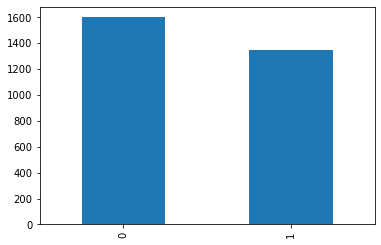

In [80]:
data_textblob["polarity_score"].value_counts().plot(kind='bar')

In [102]:
px.histogram(data_textblob,x="polarity_score", color="polarity_score", width=700,title="Sentiment Analysis using TextBlob")

#### Trying out Vader Sentiment

In [83]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [85]:
df_vader = df_model.copy()

In [86]:
df_vader.head(2)

,Location,Reviews
0,Essex,bt disappointment make new order bt black friday gentleman speak extremely polite helpful give good deal nonetheless wait days money back service run day service suppose go live call bt call bt explain engineer book since end november complete work install require equipment service go live tomorrow call present new information engineer try contact build management society since st december obtain response explain advisor phone notify go could make require arrangements sort issue also state days last weeks bt employees conduction researchwork residential area mention fail understand notice something right point bt customer essex send letter receive response build society way contact could send email call ask advisor state receive note engineer minute ago state try contact build management x receive response order cancel ask write letter send swiftly could avoid issue extremely disappoint shock bt level lack professionalism sense responsibility advisor enquire customer could chase build management seek authorization conduct work responsibility work quite outrageous propose clearly say would responsibility duty get require authorizations provide solutions problems tell issue resolve order cancel new order wait days issue resolve bt engineer professional provide good customer service could come better solutions party regret say bt prove bad appal internet providers customers aware lack professionalism customer service skills
1,Shrewsbury,receive poor download speed bt decide send engineer ask whether call cancel appointment problem resolve tell engineer arrive problem resolve bt engineer make pass comment rd party extender use game console device connect game console two laptops laptop always use ethernet cable modem issue next month receive bill state engineer employ bt company name qube say extender cause problem speak bt anything state go note rd party engineer effectively charge rd party booster house tell way get refund speak rd party company change note although give contact detail


In [87]:
df_vader['vader_scores'] = df_vader['Reviews'].apply(lambda x: analyser.polarity_scores(x))

In [89]:
df_vader["compound_score"] = df_vader['vader_scores'].apply(lambda x: x['compound'])

In [90]:
df_vader.head(2)

,Location,Reviews,vader_scores,compound_score
0,Essex,bt disappointment make new order bt black friday gentleman speak extremely polite helpful give good deal nonetheless wait days money back service run day service suppose go live call bt call bt explain engineer book since end november complete work install require equipment service go live tomorrow call present new information engineer try contact build management society since st december obtain response explain advisor phone notify go could make require arrangements sort issue also state days last weeks bt employees conduction researchwork residential area mention fail understand notice something right point bt customer essex send letter receive response build society way contact could send email call ask advisor state receive note engineer minute ago state try contact build management x receive response order cancel ask write letter send swiftly could avoid issue extremely disappoint shock bt level lack professionalism sense responsibility advisor enquire customer could chase build management seek authorization conduct work responsibility work quite outrageous propose clearly say would responsibility duty get require authorizations provide solutions problems tell issue resolve order cancel new order wait days issue resolve bt engineer professional provide good customer service could come better solutions party regret say bt prove bad appal internet providers customers aware lack professionalism customer service skills,"{'neg': 0.146, 'neu': 0.739, 'pos': 0.115, 'compound': -0.8187}",-0.8187
1,Shrewsbury,receive poor download speed bt decide send engineer ask whether call cancel appointment problem resolve tell engineer arrive problem resolve bt engineer make pass comment rd party extender use game console device connect game console two laptops laptop always use ethernet cable modem issue next month receive bill state engineer employ bt company name qube say extender cause problem speak bt anything state go note rd party engineer effectively charge rd party booster house tell way get refund speak rd party company change note although give contact detail,"{'neg': 0.122, 'neu': 0.703, 'pos': 0.175, 'compound': 0.6908}",0.6908


In [94]:
df_vader["senti_score"] = df_vader['compound_score'].apply(lambda x: '1' if x>=0 else '0')



<AxesSubplot:>

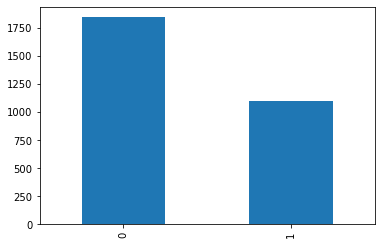

In [96]:
df_vader["senti_score"].value_counts().plot(kind='bar')

In [101]:
px.histogram(df_vader,x="senti_score", color="senti_score", width=700, title="Sentiment Analysis using Vader")

#### Trying out using flair score

In [104]:
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

2022-04-18 02:04:49,406 loading file /Users/giridharana.r/.flair/models/sentiment-en-mix-distillbert_4.pt


In [105]:
df_flair = df_model.copy()

In [107]:
df_flair.head(2)

,Location,Reviews
0,Essex,bt disappointment make new order bt black friday gentleman speak extremely polite helpful give good deal nonetheless wait days money back service run day service suppose go live call bt call bt explain engineer book since end november complete work install require equipment service go live tomorrow call present new information engineer try contact build management society since st december obtain response explain advisor phone notify go could make require arrangements sort issue also state days last weeks bt employees conduction researchwork residential area mention fail understand notice something right point bt customer essex send letter receive response build society way contact could send email call ask advisor state receive note engineer minute ago state try contact build management x receive response order cancel ask write letter send swiftly could avoid issue extremely disappoint shock bt level lack professionalism sense responsibility advisor enquire customer could chase build management seek authorization conduct work responsibility work quite outrageous propose clearly say would responsibility duty get require authorizations provide solutions problems tell issue resolve order cancel new order wait days issue resolve bt engineer professional provide good customer service could come better solutions party regret say bt prove bad appal internet providers customers aware lack professionalism customer service skills
1,Shrewsbury,receive poor download speed bt decide send engineer ask whether call cancel appointment problem resolve tell engineer arrive problem resolve bt engineer make pass comment rd party extender use game console device connect game console two laptops laptop always use ethernet cable modem issue next month receive bill state engineer employ bt company name qube say extender cause problem speak bt anything state go note rd party engineer effectively charge rd party booster house tell way get refund speak rd party company change note although give contact detail


In [108]:
s = 'Always very helpful today they sorted out a problem regarding a scam call and refunded cost. Well done BT'
d = flair.data.Sentence(s)

In [109]:
e = flair_sentiment.predict(d)

In [111]:
d

Sentence: "Always very helpful today they sorted out a problem regarding a scam call and refunded cost . Well done BT"   [− Tokens: 20  − Sentence-Labels: {'label': [POSITIVE (0.9876)]}]

In [112]:
# sentiment = []
# confidence = []
# for sentence in df["Reviews"]:
#     if sentence.strip() == "":
#         sentiment.append("")
#         confidence.append("")
#     else:

#     d = flair.data.Sentence(sentence)
#     flair_sentiment.predict(d)
#     sentiment.append(e[0].label)
#     confidence.append(e[0].score)

sentiment = []
confidence = []
for sentence in df_flair['Reviews']:
    if sentence.strip() == "":
        sentiment.append("")
        confidence.append("")
    else :
        sample = flair.data.Sentence(sentence)
        flair_sentiment.predict(sample)

        sentiment.append(sample.labels[0].value)
        confidence.append(sample.labels[0].score)

In [115]:
df_flair['sentiment'] = sentiment
df_flair['confidence'] = confidence


In [116]:
df_flair.head(2)

,Location,Reviews,sentiment,confidence
0,Essex,bt disappointment make new order bt black friday gentleman speak extremely polite helpful give good deal nonetheless wait days money back service run day service suppose go live call bt call bt explain engineer book since end november complete work install require equipment service go live tomorrow call present new information engineer try contact build management society since st december obtain response explain advisor phone notify go could make require arrangements sort issue also state days last weeks bt employees conduction researchwork residential area mention fail understand notice something right point bt customer essex send letter receive response build society way contact could send email call ask advisor state receive note engineer minute ago state try contact build management x receive response order cancel ask write letter send swiftly could avoid issue extremely disappoint shock bt level lack professionalism sense responsibility advisor enquire customer could chase build management seek authorization conduct work responsibility work quite outrageous propose clearly say would responsibility duty get require authorizations provide solutions problems tell issue resolve order cancel new order wait days issue resolve bt engineer professional provide good customer service could come better solutions party regret say bt prove bad appal internet providers customers aware lack professionalism customer service skills,NEGATIVE,0.996796
1,Shrewsbury,receive poor download speed bt decide send engineer ask whether call cancel appointment problem resolve tell engineer arrive problem resolve bt engineer make pass comment rd party extender use game console device connect game console two laptops laptop always use ethernet cable modem issue next month receive bill state engineer employ bt company name qube say extender cause problem speak bt anything state go note rd party engineer effectively charge rd party booster house tell way get refund speak rd party company change note although give contact detail,NEGATIVE,0.999785


In [117]:
px.histogram(df_flair,x="sentiment", color="sentiment", width=700, title="Sentiment Analysis using Flair")

In [120]:
df_flair["confidence"].value_counts()

0.999989    6
0.999983    5
0.999943    5
0.999949    5
0.999989    5
           ..
0.999554    1
0.753995    1
0.996544    1
0.999713    1
0.697300    1
Name: confidence, Length: 2611, dtype: int64

We can use flair model as it has very good confidence score and since its mostly around 99% and thus the labels are given & we can train the model and perform predictions.

In [123]:
# df_flair.to_csv('sentiment_analysis_using_flair.csv')

In [124]:
df_flair.describe()

,confidence
count,2950.000000
mean,0.970113
std,0.084986
min,0.500513
25%,0.993998
50%,0.999392
75%,0.999890
max,0.999998


The mean is close to 1 and so the flair model is confident about its predictions